In [3]:
import numpy as np
#  translation matrix
tx,ty,tz=8,0,5
D=[[1,0,0,tx],[0,1,0,ty],[0,0,0,tz],[0,0,0,1]]
D=np.matrix(D)

#  scaling in  direction where m is the scaling factor
mx,my,mz=2,2,2
S=[[mx,0,0,0],[0,my,0,0],[0,0,mz,0],[0,0,0,1]]
S=np.matrix(S)
# complete transformation
H=D*S
print("H: ")
print(H)
#  homogenous co-ordinates of A
A=[2,3,9,1]
A=np.matrix(A)
At=np.transpose(A)
print("Complete troansfrormation of A ")
print(H*At)

H: 
[[2 0 0 8]
 [0 2 0 0]
 [0 0 0 5]
 [0 0 0 1]]
Complete troansfrormation of A 
[[12]
 [ 6]
 [ 5]
 [ 1]]


In [8]:
M=[-2872.0,1744.3,-138.7,77270.0,-273.9,-174.8,-3287.5,94166.0,-0.7380,-0.6480,-0.1883,75.633]
M = np.reshape(M, (3,4))
M
H,h=np.hsplit(M, np.array([3, 6]))[0],np.hsplit(M, np.array([3, 6]))[1]
# H_inv= Rt* Kinv
H_inv=np.linalg.inv(H)
# Qr decomposition of H
Rt,kinv=np.linalg.qr(H)

Rot = ([[-1,0,0,0],[0,-1,0,0],[0,0, 1,0],[0,0,0,1]])






array([[-9.95483125e-01,  9.49386423e-02,  4.94846659e-05],
       [-9.49383105e-02, -9.95477972e-01, -3.21327546e-03],
       [-2.55803115e-04, -3.20345949e-03,  9.99994836e-01]])

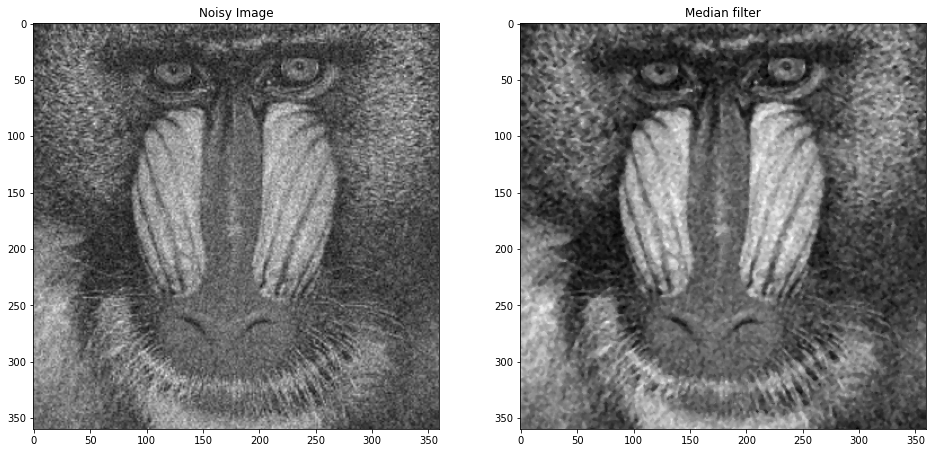

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('baboon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,3)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

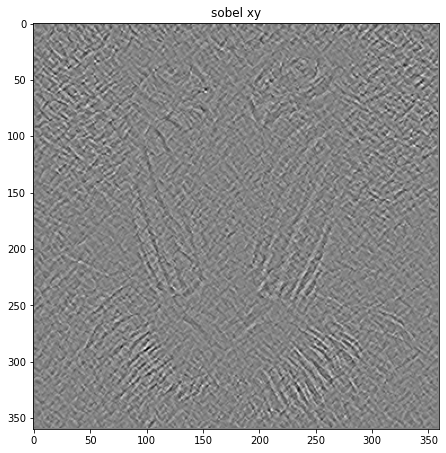

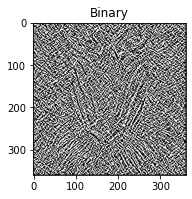

In [32]:
import math
# Sobel Edge Detection

sobelx = cv2.Sobel(src=median, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=median, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=median, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

plt.figure(figsize=(16, 16))
# # Use the x & direction to compute the image orientation
# tan=np.arctan(sobelx/sobely)
# plt.subplot(1,2,1),
# plt.plot(tan)

plt.subplot(1,2,1),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()


ret,thresh1 = cv2.threshold(sobelxy,0,255,cv2.THRESH_BINARY)
plt.subplot(1,2,2),
plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary')
plt.show()






